In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score
import numpy as np

# Load dataset
data = pd.read_csv("2019.csv")
data.head()



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
# Step 1: Data Preprocessing
# Selecting relevant columns for clustering and regression
relevant_data = data[
    ["Score", "GDP per capita", "Social support", "Healthy life expectancy",
     "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
]

In [3]:
# Step 2: Bar Chart Visualization
def plot_bar_chart():
    """Plot a bar chart of the top 10 happiest countries."""
    top_10 = data.nlargest(10, "Score")
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Score", y="Country or region", data=top_10, palette="viridis")
    plt.title("Top 10 Happiest Countries (2019)")
    plt.xlabel("Happiness Score")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

In [4]:
# Step 3: Scatter Plot with Regression Line
def plot_scatter_with_fit():
    """Plot a scatter plot of GDP per capita vs. happiness score with a regression line."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="GDP per capita", y="Score", data=data, color="blue", label="Data Points")

    # Fit a linear regression model
    X = data["GDP per capita"].values.reshape(-1, 1)
    y = data["Score"].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot the regression line
    plt.plot(data["GDP per capita"], y_pred, color="red", label="Regression Line")
    plt.title("GDP per Capita vs. Happiness Score")
    plt.xlabel("GDP per Capita")
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print regression details
    print("Regression Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Squared Error:", mean_squared_error(y, y_pred))

In [5]:
# Step 4: K-means Clustering and Elbow Plot
def plot_elbow_method(data):
    """Perform K-means clustering and plot the elbow curve."""
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, marker="o", linestyle="--", color="blue")
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Distortion")
    plt.xticks(K)
    plt.tight_layout()
    plt.show()

In [6]:
# Step 5: Heatmap Visualization
def plot_correlation_heatmap():
    """Plot a heatmap to show the correlation matrix."""
    plt.figure(figsize=(10, 6))
    corr_matrix = relevant_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

<ipython-input-3-7ff2c22e71b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="Country or region", data=top_10, palette="viridis")


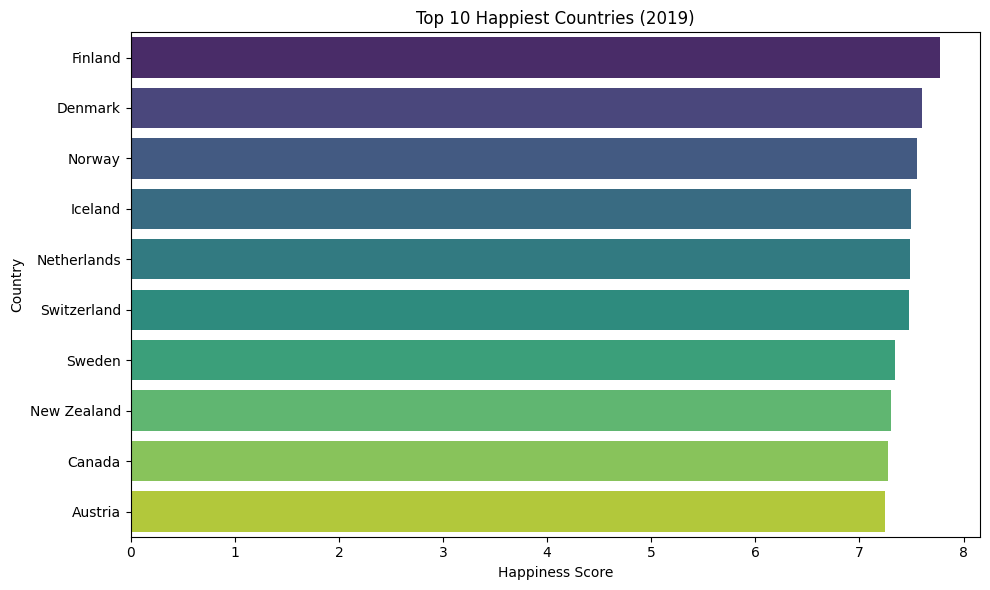

In [7]:
# Execute all steps
plot_bar_chart()

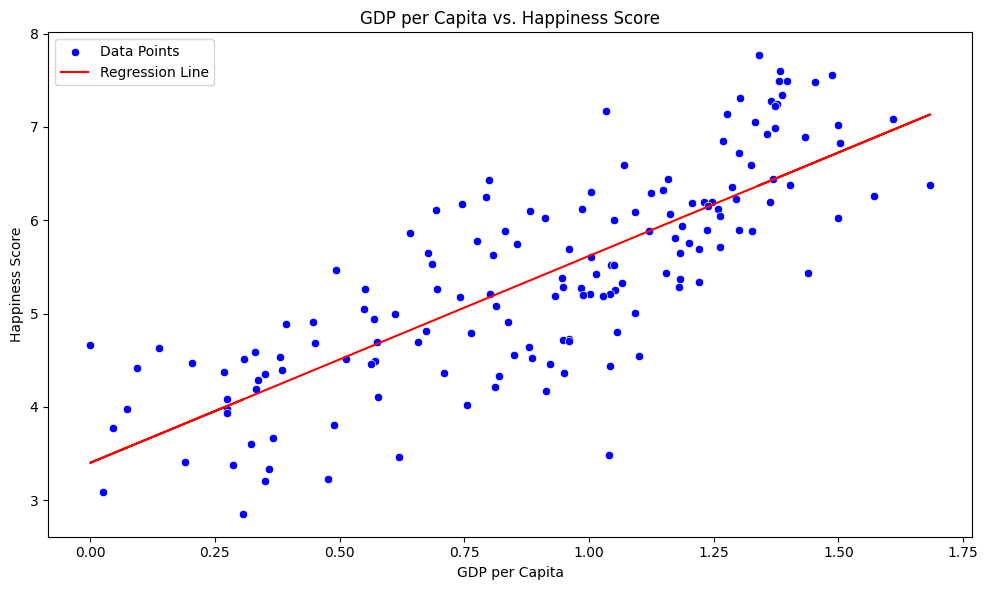

Regression Coefficients: [2.218148]
Intercept: 3.399345178292417
Mean Squared Error: 0.4551967397324354


In [8]:
plot_scatter_with_fit()

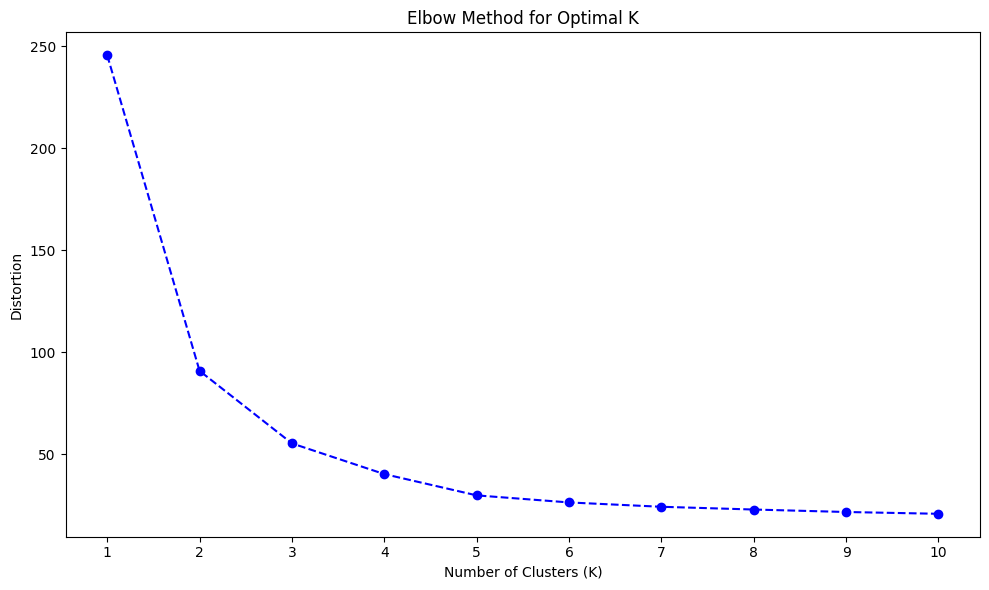

In [9]:
plot_elbow_method(relevant_data)

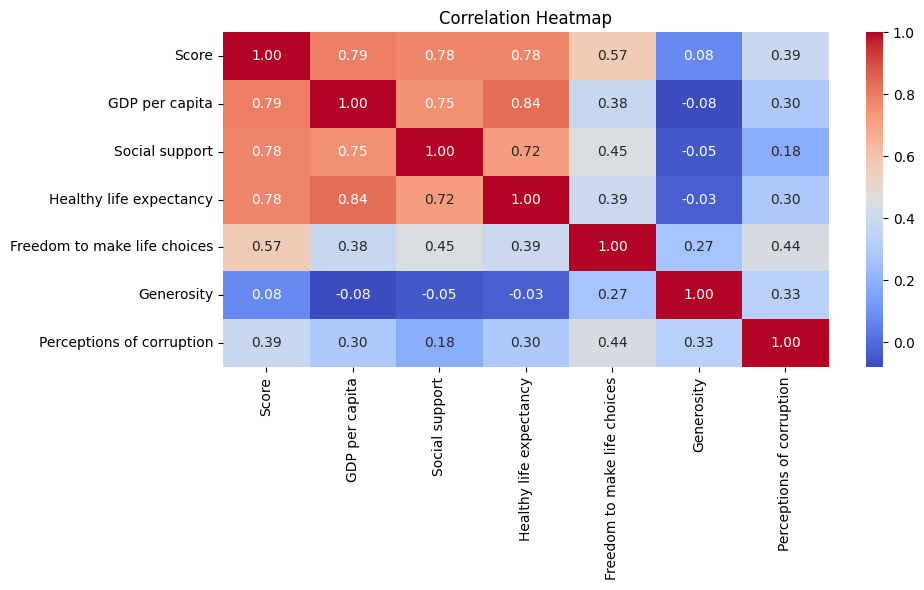

In [10]:
plot_correlation_heatmap()